In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating Reservoir Permeability using Well Test Data: Well Test Analysis

Pwf = Pi -m[log(t)+C] -------------- relationship between the bottom hole pressure and initial reservior pressure, Pi =2760

In [2]:
Pressure_data = pd.read_csv('test.csv')

## First step ---- Cartesian Analysis: Tells what kind of test it is.

In [3]:
Pressure_data.head()

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83


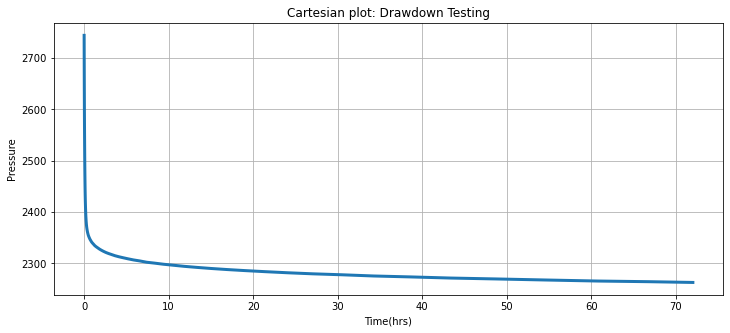

In [4]:
plt.figure(figsize=(12,5))

plt.plot(Pressure_data.time, Pressure_data.pressure, lw=3)

plt.xlabel('Time(hrs)')
plt.ylabel('Pressure')

plt.title('Cartesian plot: Drawdown Testing')
plt.grid();

## Second Step ------ Semilog Analysis: High Level searching for MTR

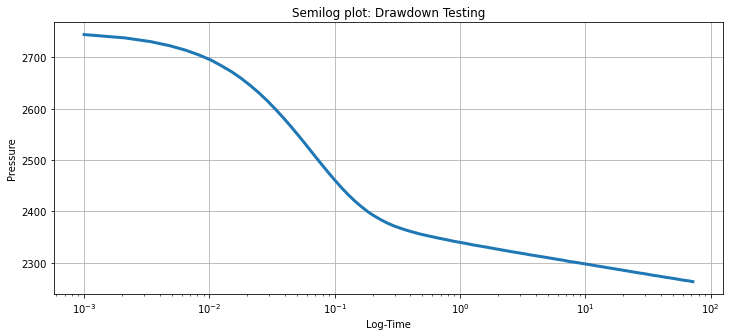

In [5]:
plt.figure(figsize=(12,5))

plt.semilogx(Pressure_data.time, Pressure_data.pressure, lw=3)

plt.xlabel('Log-Time')
plt.ylabel('Pressure')

plt.title('Semilog plot: Drawdown Testing')
plt.grid();

bordet --- derivative log log analysis

## Third Step ---- Derivative/Log-Log plot: Computations

In [6]:
Pi = 2760

Pressure_data['ΔP'] = np.abs(Pi - Pressure_data['pressure']) #abs is used to avoid negatives

# we need to find the differential of ΔP
Pressure_data['d(ΔP)']=np.zeros(len(Pressure_data))
Pressure_data['d(ΔP)'].iloc[1:] = np.abs(np.diff(Pressure_data['ΔP']))

Pressure_data['dt']= np.zeros(len(Pressure_data))
Pressure_data['dt'].iloc[1:] = np.diff(Pressure_data['time'])

#P'= t*dP/dt
Pressure_data["P'"] = np.zeros(len(Pressure_data))
Pressure_data["P'"].iloc[1:] = (Pressure_data['time'].iloc[1:] *Pressure_data['d(ΔP)'].iloc[1:])/Pressure_data['dt'].iloc[1:]




Pressure_data.head()


,time,pressure,ΔP,d(ΔP),dt,P'
0,0.0010,2743.96,16.04,0.00,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000


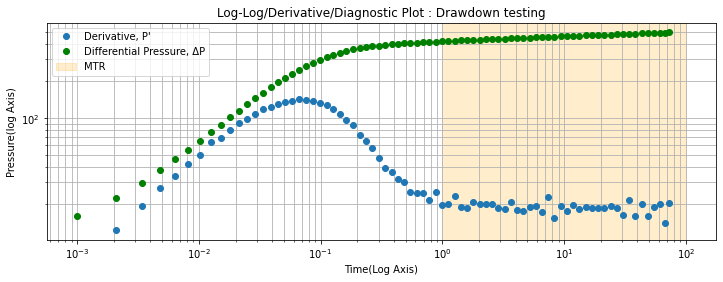

In [7]:
plt.figure(figsize=(12,4))

plt.loglog(Pressure_data['time'], Pressure_data["P'"], 'o', label="Derivative, P'")
plt.loglog(Pressure_data['time'], Pressure_data["ΔP"], 'o', label="Differential Pressure, ΔP", color='green')

plt.axvspan(1,100, color='orange', alpha=0.2, label='MTR')

plt.xlabel('Time(Log Axis)'); plt.ylabel('Pressure(log Axis)')

plt.title('Log-Log/Derivative/Diagnostic Plot : Drawdown testing')

plt.legend()
plt.grid(True, which='both')

In [8]:
#chose 1hr-50hr for mtr range
tmin_mtr = 1 #hr
tmax_mtr = 50 #hrs

In [9]:
mtr_region = Pressure_data[(Pressure_data['time']>=tmin_mtr) & (Pressure_data['time'] <= tmax_mtr)]

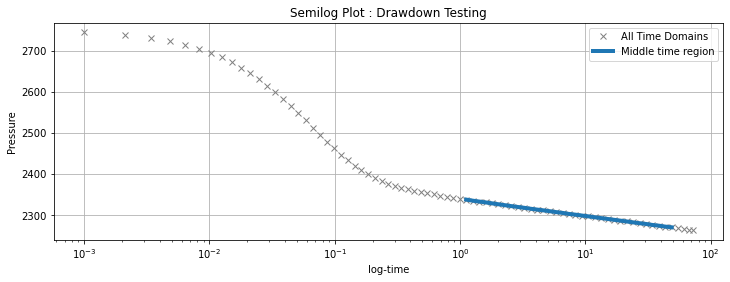

In [10]:
plt.figure(figsize=(12,4))

plt.semilogx(Pressure_data.time, Pressure_data.pressure,'x', color='gray',lw=3, label='All Time Domains')
plt.semilogx(mtr_region.time, mtr_region.pressure, lw=4,label= 'Middle time region' )

plt.xlabel('log-time')
plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')

plt.legend()
plt.grid();

## Finding Permeability

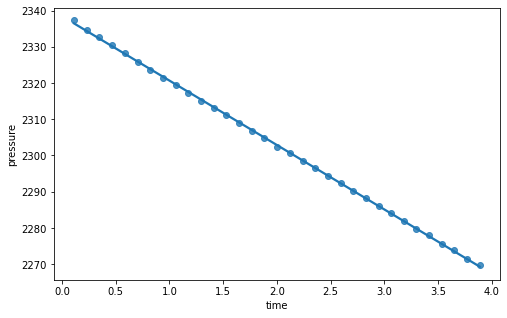

In [11]:
t= np.log(mtr_region.time)
p = mtr_region.pressure

plt.figure(figsize=(8,5))

sns.regplot(x=t, y=p);

In [12]:
np.polyfit(t,p,1)

array([ -17.7869321 , 2338.42912687])

In [13]:
slope,intercept = np.polyfit(t,p,1)

In [14]:
m= abs(slope)

m=162.6quB/kh

In [15]:
q = 125 #stb/d
u = 2.1 #cp
B = 1.14 #cp/stb
h = 50 #ft

k = 162.6*q*u*B/(m*h)

print (f'formation permeability is: {np.round(k,2)} millidarcies')

formation permeability is: 54.71 millidarcies


In [16]:
Pressure_data.to_excel('P-T data.xlsx', index =False)
mtr_region.to_excel('middle time.xlsx', index = False)

# Defining functions

1. Collect P-T data 
2. Calculate necessary columns for plotting like ΔP, d(ΔP),d(Δt), P'
3. Detect test type
4. Plot the Pwf vs t on cartesian plot using the detected test type name as the header
5. Plot the derivative and differential pressure plot on log log scale
6. Determine the infinite acting region and use the region data to determine the permeability (K)
   - also determine skin

-------------------------------------------------------------------------------------------------------------------------------
Other things to do
1. Use diagnostic plot to determine pseudosteady state / boundary acting region
2. Use data to determine the reservoir volume
 

In [ ]:
# defining function that calculates other data needed from p-t data

def table(Pressure_data, Pi):
    
    Pi = 2760

    Pressure_data['ΔP'] = np.abs(Pi - Pressure_data['pressure']) #abs is used to avoid negatives

    # we need to find the differential of ΔP
    Pressure_data['d(ΔP)']=np.zeros(len(Pressure_data))
    Pressure_data['d(ΔP)'].iloc[1:] = np.abs(np.diff(Pressure_data['ΔP']))

    Pressure_data['dt']= np.zeros(len(Pressure_data))
    Pressure_data['dt'].iloc[1:] = np.diff(Pressure_data['time'])

    #P'= t*dP/dt
    Pressure_data["P'"] = np.zeros(len(Pressure_data))
    Pressure_data["P'"].iloc[1:] = (Pressure_data['time'].iloc[1:] *Pressure_data['d(ΔP)'].iloc[1:])/Pressure_data['dt'].iloc[1:]
    
    return Pressure_data


In [ ]:
# function that detects test type

def detect(Pressure_data):
    test_type=''
    if Pressure_data['pressure'][0] - Pressure_data['pressure'][-1] > 0:
        test_type = 'Drawdown testing'
    elif Pressure_data['pressure'][0] - Pressure_data['pressure'][-1] < 0:
        test_type = 'Buildup testing'
        
    return test_type

In [ ]:
# Function that Plots the Pwf vs t on cartesian plot using the detected test type name as the header

def cartesianplotter(Pressure_data):
    test_type = detect(Pressure_data)
    
    plt.figure(figsize=(12,5))

    plt.plot(Pressure_data.time, Pressure_data.pressure, lw=3)

    plt.xlabel('Time(hrs)')
    plt.ylabel('Pressure')

    plt.title(f'Cartesian plot: {test_type}')
    plt.grid()
    
    return plt.show()

In [ ]:
# function that Plots the derivative and differential pressure plot on log log scale

def loglogplotter(Pressure_data):
    
    test_type = detect(Pressure_data)
    
    plt.figure(figsize=(12,4))

    plt.loglog(Pressure_data['time'], Pressure_data["P'"], 'o', label="Derivative, P'")
    plt.loglog(Pressure_data['time'], Pressure_data["ΔP"], 'o', label="Differential Pressure, ΔP", color='green')

    plt.axvspan(1,100, color='orange', alpha=0.2, label='MTR')

    plt.xlabel('Time(Log Axis)'); plt.ylabel('Pressure(log Axis)')

    plt.title(f'Log-Log/Derivative/Diagnostic Plot : {test_type}')

    plt.legend()
    plt.grid(True, which='both')
    
    return plt.show()

In [ ]:
# Function that Determine the infinite acting region and use the region data to determine the permeability (K) 
# and also determine skin


def detect_infinite_radial_flow(pressure_data, tp):
    """
    Detects the period where the flow is in an infinite-acting radial flow
    using the fact that a horizontal derivative indicates infinite acting radial flow
    in a log-log plot.
    
    Args:
        pressure_data (pd.DataFrame): A dataframe containing pressure data that includes
        pressure derivative values and pressure differentials for each time.
    
    Returns:
        pd.DataFrame: The segment of data that falls in the infinite-acting radial flow period.
    """
    
    # Extract pressure derivative and time data
    derivative = pressure_data["P'"].values
    time = pressure_data['time'].values
    
    # Calculate the logarithmic values of derivative and time
    log_derivative = np.log10(derivative)
    log_time = np.log10(time)
    
    # Find the indices where derivative is horizontal
    indices = np.where(np.gradient(log_derivative) == 0)[0]
    
    # Check if any horizontal derivative exists
    if len(indices) == 0:
        return None
    
    # Find the segment of data that falls in the infinite-acting radial flow period
    segment_start = indices[-1] + 1
    segment_end = len(pressure_data)
    segment = pressure_data.iloc[segment_start:segment_end].reset_index(drop=True)
    
    if detect(Pressure_data) == 'Buildup testing': 
        segment['htr'] = ((segment['time'] + tp)/segment['time'])
    
    return segment

In [ ]:
# formular for calculating permeability

def perm(segment, q,u,B,h):
    
    t= np.log(segment.time)
    p = segment.pressure
    slope,intercept = np.polyfit(t,p,1)
    m= abs(slope)
    k = 162.6*q*u*B/(m*h)
    
    return np.round(k,2)    

In [ ]:
# determine Pressure at 1 hr for build up

def Pb1hr(segment,tp):
    t_htr= np.log(segment.htr)
    p = segment.pressure
    model = np.polyfit(np.log(t_htr), p, 1)
    slope = model[0]
    Pb1hr = slope * np.log(tp+1) + model[1]
    
    return Pb1hr


# determine pressure at 1hr for drawdown
def Pdd1hr(segment):
    t= np.log(segment.time)
    p = segment.pressure
    model = np.polyfit(np.log(t), p, 1)
    slope = model[0]
    Pb1hr = slope * np.log(1) + model[1]
    
    return Pdd1hr
    

In [ ]:
# Determine skin depending on the type of test

def skin(Pressure_data, Pi, segment, tp):
    test_type = detect(Pressure_data)
    if test_type == 'Drawdown testing':
        Pdd1hr = Pdd1hr(segment)
        skin_fact = 1.151( ((Pi-Pdd1hr)/m) - np.log(k/ phi*u*ct*rw**2) + 3.23)
    elif test_type == 'Buildup testing':
        Pb1hr = Pb1hr(segment,tp)
        skin_fact = 1.151( ((Pb1hr-Pressure_data.pressure[0])/m) - np.log(k/ phi*u*ct*rw**2) + 3.23)
        
    return skin_fact
        
    


In [ ]:
# to determine initial pressure for buildup data

def Pinitial(segment):
    t_htr= np.log(segment.htr)
    p = segment.pressure
    model = np.polyfit(np.log(t_htr), p, 1)
    slope = model[0]
    Pinitial = slope * np.log(1) + model[1]
    
#     xfit = np.log(np.linspace(np.min(x), 1, 100))
#     yfit = np.polyval(model, xfit)
    
    return Pinitial
    

In [ ]:
# # For noisy data we would need some tolerance level

# def detect_infinite_radial_flow(pressure_data, tol=1e-3):
#     """
#     Detects the period where the flow is in an infinite-acting radial flow
#     using the fact that a horizontal derivative indicates infinite acting radial flow
#     in a log-log plot.
    
#     Args:
#         pressure_data (pd.DataFrame): A dataframe containing pressure data that includes
#         pressure derivative values and pressure differentials for each time.
#         tol (float): Tolerance for detecting horizontal derivative. Defaults to 1e-3.
    
#     Returns:
#         pd.DataFrame: The segment of data that falls in the infinite-acting radial flow period.
#     """
    
#     # Extract pressure derivative and time data
#     derivative = pressure_data['derivative'].values
#     time = pressure_data['time'].values
    
#     # Calculate the logarithmic values of derivative and time
#     log_derivative = np.log10(derivative)
#     log_time = np.log10(time)
    
#     # Find the indices where derivative is close to horizontal
#     indices = np.where(np.isclose(np.gradient(log_derivative), 0, atol=tol))[0]
    
#     # Check if any close-to-horizontal derivative exists
#     if len(indices) == 0:
#         return None
    
#     # Find the segment of data that falls in the infinite-acting radial flow period
#     segment_start = indices[-1] + 1
#     segment_end = len(pressure_data)
#     segment = pressure_data.iloc[segment_start:segment_end].reset_index(drop=True)
    
#     return segment
